<a href="https://colab.research.google.com/github/Yash-coder-alt/Level_2_Task_/blob/main/Cuisine_Combination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("Dataset .csv")  # Ensure the file is in the working directory

In [3]:
# Set plot styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [4]:
# Show the top 10 most common cuisine combinations
cuisine_counts = df['Cuisines'].value_counts().dropna().head(10)

<ipython-input-5-bf0fc0c7c107>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cuisine_counts.index, x=cuisine_counts.values, palette="viridis")


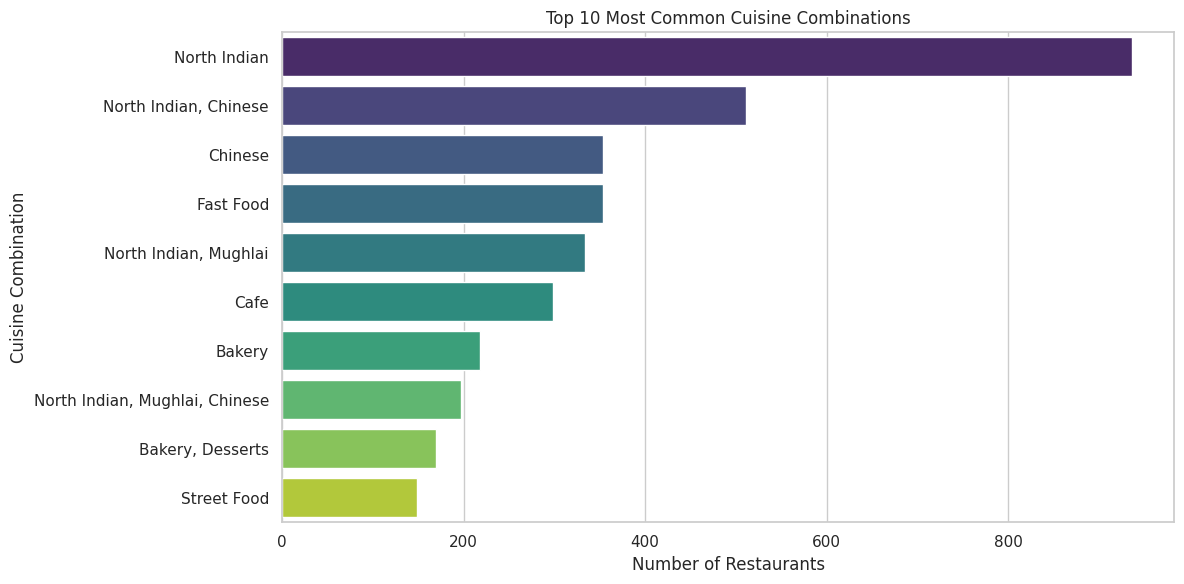

In [5]:
# Plot top 10 cuisine combinations
plt.figure(figsize=(12, 6))
sns.barplot(y=cuisine_counts.index, x=cuisine_counts.values, palette="viridis")
plt.title("Top 10 Most Common Cuisine Combinations")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Combination")
plt.tight_layout()
plt.show()

In [6]:
# Calculate average rating for each cuisine combination
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().dropna()

In [7]:
# Merge count and rating
cuisine_stats = pd.DataFrame({
    'Count': df['Cuisines'].value_counts(),
    'Average Rating': cuisine_ratings
}).dropna()

In [8]:
# Get top 10 highest-rated combinations (with at least 50 restaurants to be meaningful)
popular_rated = cuisine_stats[cuisine_stats['Count'] >= 50].sort_values(by='Average Rating', ascending=False).head(10)

<ipython-input-9-d4b9fa99f961>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=popular_rated.index, x=popular_rated['Average Rating'], palette='coolwarm')


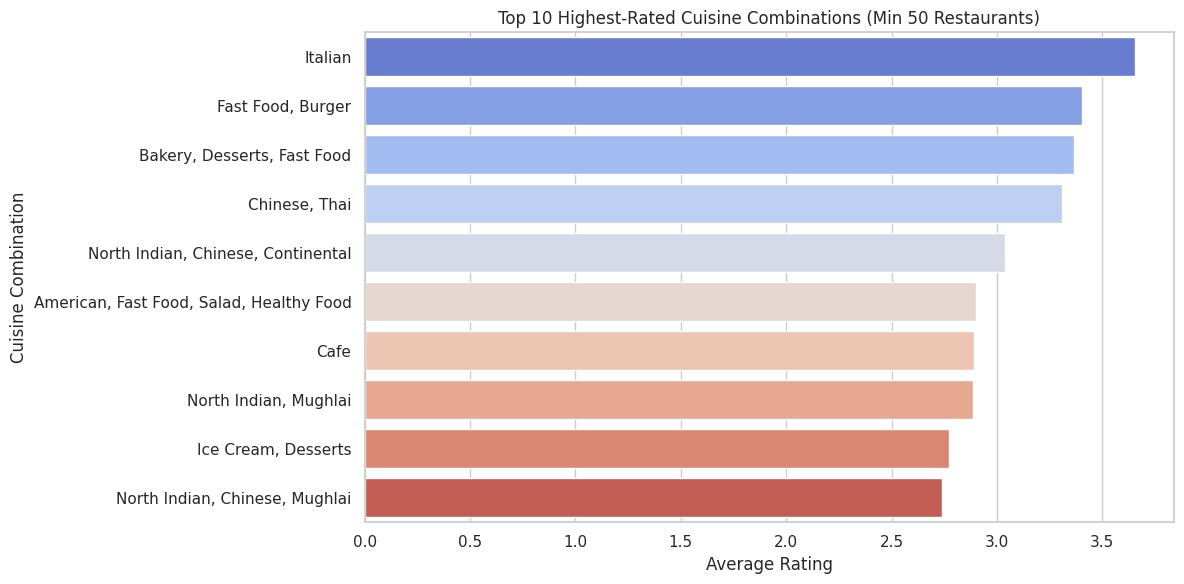

In [9]:
# Plot top rated cuisine combos
plt.figure(figsize=(12, 6))
sns.barplot(y=popular_rated.index, x=popular_rated['Average Rating'], palette='coolwarm')
plt.title("Top 10 Highest-Rated Cuisine Combinations (Min 50 Restaurants)")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine Combination")
plt.tight_layout()
plt.show()

In [10]:
# Calculate average rating per Cuisine and City
city_cuisine_rating = df.groupby(['City', 'Cuisines'])['Aggregate rating'].mean().reset_index()

In [11]:
# Get top 5 cities with most restaurants
top_cities = df['City'].value_counts().head(5).index
city_cuisine_top = city_cuisine_rating[city_cuisine_rating['City'].isin(top_cities)]



In [12]:
# Get top 5 most frequent cuisine combinations
top_cuisines = df['Cuisines'].value_counts().head(5).index
city_cuisine_top = city_cuisine_top[city_cuisine_top['Cuisines'].isin(top_cuisines)]

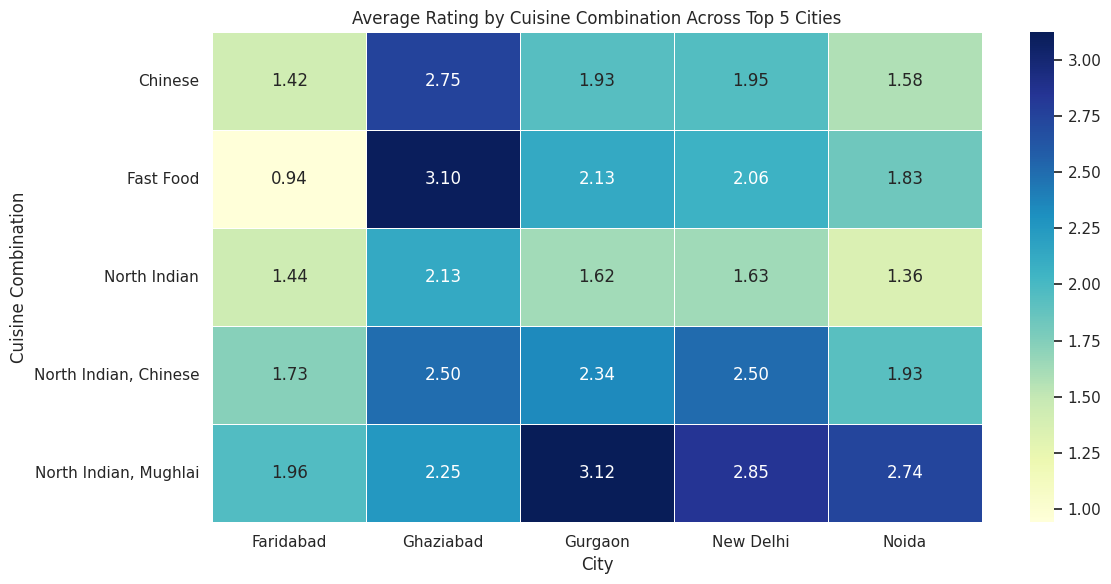

In [15]:
# Create pivot table for heatmap (FIXED)
pivot_table = city_cuisine_top.pivot(index="Cuisines", columns="City", values="Aggregate rating")

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Average Rating by Cuisine Combination Across Top 5 Cities")
plt.xlabel("City")
plt.ylabel("Cuisine Combination")
plt.tight_layout()
plt.show()
